качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics as st
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [2]:
### для загрузки данных
with open('project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [3]:
mean1, median1, mode1 = st.mean(product1), st.median(product1), st.mode(product1)
mean2, median2, mode2 = st.mean(product2), st.median(product2), st.mode(product2)

print("Product1:")
print("Mean:", mean1, " Median:", median1, " Mode:", mode1)

print("Product2:")
print("Mean:", mean2, " Median:", median2, " Mode:", mode2)

Product1:
Mean: 199.103  Median: 198.5  Mode: 186
Product2:
Mean: 193.5  Median: 194.5  Mode: 227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

Наименее показательной метрикой является мода, она отражает только наиболее часто встречающееся значение и не учитывает общую тенденцию.
На основе среднего и медианы можно сделать вывод, что Product1 приносит больше выручки в среднем, чем Product2

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [4]:
std1 = np.std(product1, ddof=1)
std2 = np.std(product2, ddof=1)

print('Std product1', std1)
print('Std product2', std2)

print('\nProduct1 даёт более точную оценку, чем Product2, так как у него меньше стандартное отклонение')

Std product1 28.808372278095014
Std product2 29.738082240681482

Product1 даёт более точную оценку, чем Product2, так как у него меньше стандартное отклонение


**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

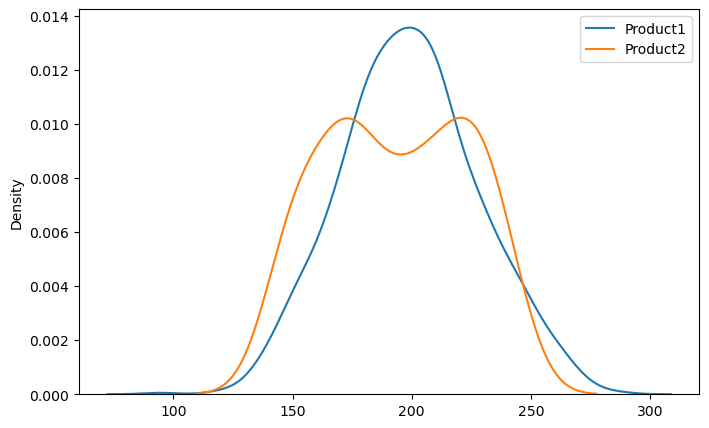

In [5]:
plt.figure(figsize=(8,5))
sns.kdeplot(product1, label='Product1')
sns.kdeplot(product2, label='Product2')
plt.legend()
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [6]:
p1 = np.max(product1) - np.min(product1)
p2 = np.max(product2) - np.min(product2)

print('Размах продукт1:', p1)
print('Размах продукт2:', p2)

# Стандартное отклонение
std_p1 = np.std(product1, ddof=1)
std_p2 = np.std(product2, ddof=1)

print('Ст. отклонение продукт1:', std_p1)
print('Ст. отклонение продукт2:', std_p2)

print('''\nРазмах Product1 больше, чем у Product2, стандартные отклонения почти одинаковы. 
У Product1 есть выбросы, которые увеличили размах, но не сильно повлияли на стандартное отклонение.''')

Размах продукт1: 193
Размах продукт2: 97
Ст. отклонение продукт1: 28.808372278095014
Ст. отклонение продукт2: 29.738082240681482

Размах Product1 больше, чем у Product2, стандартные отклонения почти одинаковы. 
У Product1 есть выбросы, которые увеличили размах, но не сильно повлияли на стандартное отклонение.


**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [7]:
q1_p1 = np.percentile(product1, 25)
q3_p1 = np.percentile(product1, 75)
iqr_p1 = q3_p1 - q1_p1

q1_p2 = np.percentile(product2, 25)
q3_p2 = np.percentile(product2, 75)
iqr_p2 = q3_p2 - q1_p2

print("IQR продукт1:", iqr_p1)
print("IQR продукт2:", iqr_p2)

low_p1, high_p1 = q1_p1 - 1.5 * iqr_p1, q3_p1 + 1.5 * iqr_p1
low_p2, high_p2 = q1_p2 - 1.5 * iqr_p2, q3_p2 + 1.5 * iqr_p2

p1_no_outliers = [x for x in product1 if low_p1 <= x <= high_p1]
p2_no_outliers = [x for x in product2 if low_p2 <= x <= high_p2]

print("\nБез выбросов — ст. отклонение продукт1:", np.std(p1_no_outliers, ddof=1))
print("Без выбросов — ст. отклонение продукт2:", np.std(p2_no_outliers, ddof=1))    

print('''\nПосле удаления выбросов стандартные отклонения почти не изменились, 
значит разброс у обоих продуктов примерно одинаковый, а различия связаны 
в основном с выбросами''')

IQR продукт1: 38.25
IQR продукт2: 51.0

Без выбросов — ст. отклонение продукт1: 28.314081624160302
Без выбросов — ст. отклонение продукт2: 29.738082240681482

После удаления выбросов стандартные отклонения почти не изменились, 
значит разброс у обоих продуктов примерно одинаковый, а различия связаны 
в основном с выбросами


**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

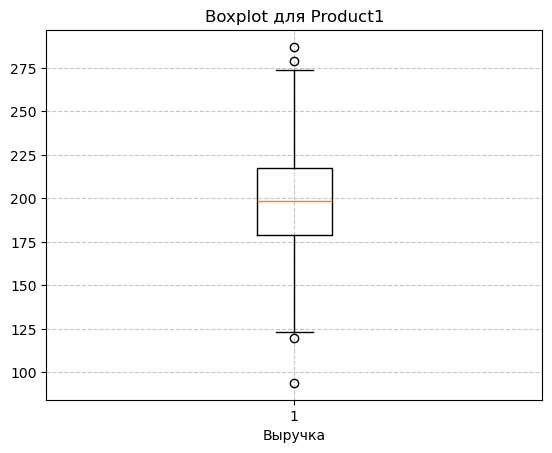

Нижняя граница выбросов: 121.625
Верхняя граница выбросов: 274.625


In [8]:
plt.boxplot(product1)
plt.title("Boxplot для Product1")
plt.xlabel("Выручка")
plt.grid(True, axis="both", linestyle="--", alpha=0.7)
plt.show()

q1 = np.percentile(product1, 25)
q3 = np.percentile(product1, 75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

print("Нижняя граница выбросов:", low)
print("Верхняя граница выбросов:", high)

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

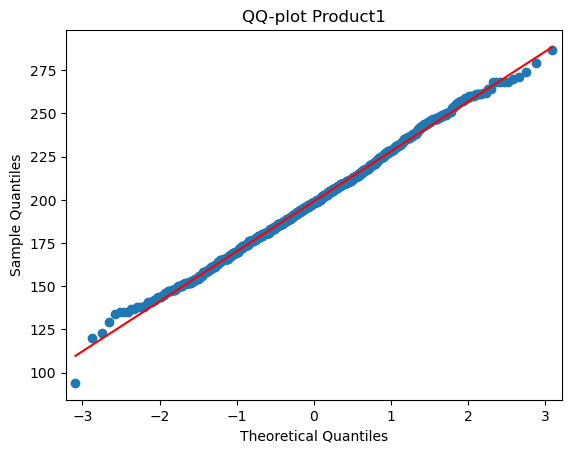

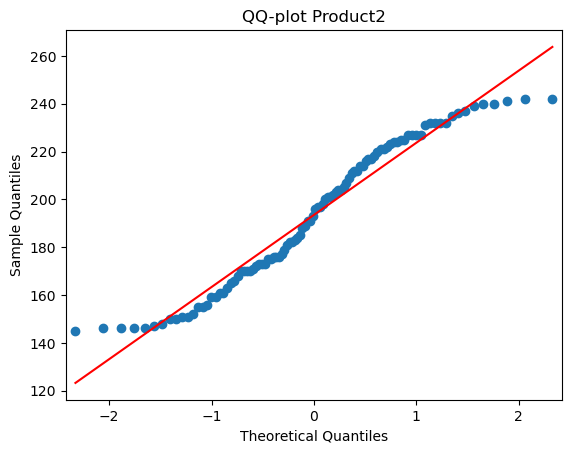

Product1 распределение близко к нормальному.


In [9]:
sm.qqplot(np.array(product1), line='r')
plt.title('QQ-plot Product1')
plt.show()

sm.qqplot(np.array(product2), line='r')
plt.title('QQ-plot Product2')
plt.show()

print('Product1 распределение близко к нормальному.')

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

В нижнем хвосте (малые значения, около 140–150) наблюдается слишком много одинаковых значений, 
в середине (170–200) точек больше, 
в верхнем хвосте (выше 220) наоборот, значений не хватает

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [10]:
mean_p1, std_p1 = np.mean(product1), np.std(product1)

product1_z = (product1 - mean_p1) / std_p1

print('Mean:', mean_p1)
print('Std:', std_p1)

Mean: 199.103
Std: 28.793964489107783


Нарисуйте kdeplot нового стандартного распределения

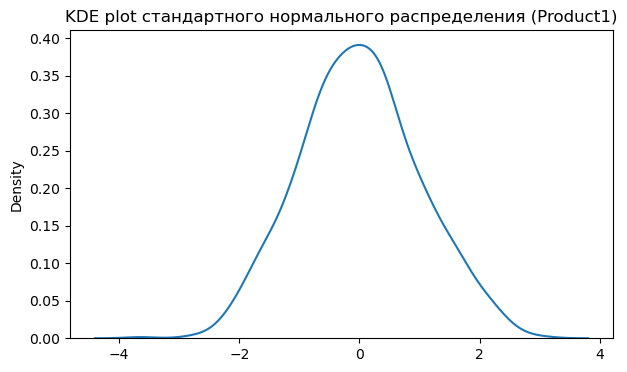

In [11]:
plt.figure(figsize=(7, 4))
sns.kdeplot(product1_z)
plt.title("KDE plot стандартного нормального распределения (Product1)")
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [12]:
q_1 = norm.ppf(0.01)  
print("Точка для 1% вероятности слева:", q_1)

Точка для 1% вероятности слева: -2.3263478740408408


Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

Число 94 для продукта1 является аномально низким значением, оно попадает в крайне маловероятную область нормального распределения и существенно выделяется из общей выборки.

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [13]:
mean_p2 = np.mean(product2)
print("Точечная оценка средней выручки продукта2:", mean_p2)

Точечная оценка средней выручки продукта2: 193.5


Подсчитайте 95% доверительный интервал

In [25]:
mean = np.mean(product2)
t_dist_std = np.std(product2, ddof=1) / np.sqrt(len(product2))
dof = len(product2) - 1
ul = t.ppf(0.975, dof, mean, t_dist_std)
ll = t.ppf(0.025, dof, mean, t_dist_std)

print(f"95% доверительный интервал: {ll:.2f}, {ul:.2f}")

95% доверительный интервал: 187.60, 199.40


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [28]:
mean_h0 = 197.5
alpha = 0.05

mean = np.mean(product1)
std = np.std(product1, ddof=1)
n = len(product1)

t_stat = (mean - mean_h0) / (std / np.sqrt(n))

p_value = 1 - t.cdf(t_stat, df=n-1)

print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("Отклоняем: средняя выручка продукта1 выше 197.5")
else:
    print("Не отклоняем: нет статистически значимых доказательств, что средняя выше 197.5")

t-статистика: 1.760
p-value: 0.039
Отклоняем: средняя выручка продукта1 выше 197.5
199.103


Какой это был типа АБ теста?

one-sample t-test, one-tailed

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [45]:
p1_mean = np.mean(product1) 
p2_mean = np.mean(product2)

p1_std = np.std(product1, ddof=1)
p2_std = np.std(product2, ddof=1)
p1_size = len(product1)
p2_size = len(product2)

err_diff = np.sqrt(p1_std**2/p1_size + p2_std**2/p2_size)

diff_mean = p1_mean - p2_mean

t_stat = diff_mean / err_diff

dof = ( (p1_std**2/p1_size + p2_std**2/p2_size)**2 /
        ((p1_std**2/p1_size)**2/(p1_size-1) + (p2_std**2/p2_size)**2/(p2_size-1)) )

p_value = 2 * (1 - t.cdf(abs(t_stat), df=dof))

alpha = 0.05

print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("Отклоняем: средние выручки различаются")
else:
    print("Не отклоняем: нет статистически значимых различий")


t-статистика: 1.801
p-value: 0.074
Не отклоняем: нет статистически значимых различий
